<a href="https://colab.research.google.com/github/thehapyone/Thesis_Project/blob/master/Entity_Embeddings_v8_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learned Embeddings - AutoEncoders
This program will attempt to create embeddings for the categorical features using the pipelines code developed.

function ClickConnect(){
console.log("Working");
document.querySelector("colab-connect-button").shadowRoot.getElementById('connect').click()
}
setInterval(ClickConnect,60000)

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy as copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import sys
sys.path.append('drive/My Drive/Thesis/Collab Notebooks/')

In [0]:
#%run drive/"My Drive"/Thesis/"Collab Notebooks"/category_pipeline.ipynb
#%load

In [0]:
# using the latest updated file
#data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_Sorted_Raw_Db_with_RUL.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Feature_Engineering/KNN_Imputed_Datasets/KNN_Imputed_k_40.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)
#ata = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v4_Sorted_Raw_Db_with_RUL_imputed.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/sorted_data_new_full.csv", sep=',', low_memory=False)
data = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/v2_sorted_data_new.csv", sep=',', low_memory=False)
data2 = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v5_Sorted_Raw_Db_with_RUL_imputed.csv", sep=',', low_memory=False)




## Pipeline Extraction

In [0]:
# Applying the Extraction pipeline
# first stage of the pipeline
from extraction_pipeline import *
from category_pipeline import *

In [0]:
'''
# remove duplicates
#data = removeDuplicates(data, debug=True)
data = data.drop(labels=['DELIVERY_DATE.1'], axis=1)
print ('After duplicates removal - ',data.shape)

# the only duplicate column discovered was - ['DELIVERY_DATE.1']
print ('After duplicates removal - ',data.shape)
# Remove zero variance
data = removeZeroVariance(data, debug=True)
print ('After Zero Variance removal - ',data.shape)
'''
# drop redundant features
#data = dropRedundantFeatures(data)
print ('After Redundant Drop removal - ',data.shape)


After Redundant Drop removal -  (19954, 75)


In [0]:
# date extractor
# data = dateInfoExtractor(raw_data=data, debug=False)
print ('After date extractor - ',data.shape)

After date extractor -  (19954, 75)


In [0]:
# missing values analysis
#
print ("missing values rate before: ", 100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0]) )
#data = fillMissingValues(data)
print ("missing values rate after: ", 100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0]) )


missing values rate before:  T_CHASSIS                              0.0
VAR_2DX_REAR_CAB_SUSPENSION            0.0
VAR_FFX_PUSHER_AXLE_FEATURES           0.0
VAR_5CB_AIR_SUSP_FEATURE_SOFTWARE      0.0
VAR_2GB_CLUTCHABLE_AIR_COMPRESSOR      0.0
                                      ... 
VAR_T3X_PTO_ENGINE_REAR_MOUNTED        0.0
VAR_PJX_ALTERNATOR_CAPACITY            0.0
VAR_41X_PARKING_HEATER                 0.0
VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL    0.0
DAY                                    0.0
Length: 75, dtype: float64
missing values rate after:  T_CHASSIS                              0.0
VAR_2DX_REAR_CAB_SUSPENSION            0.0
VAR_FFX_PUSHER_AXLE_FEATURES           0.0
VAR_5CB_AIR_SUSP_FEATURE_SOFTWARE      0.0
VAR_2GB_CLUTCHABLE_AIR_COMPRESSOR      0.0
                                      ... 
VAR_T3X_PTO_ENGINE_REAR_MOUNTED        0.0
VAR_PJX_ALTERNATOR_CAPACITY            0.0
VAR_41X_PARKING_HEATER                 0.0
VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL    0.0
DAY          

## Category Pipeline


In [0]:
# Date transformation
#data = extraTrasfromToCategory(data, debug=True)

'''
# Zero Variance removal
data = removeZeroCategory(data)
print ('After all removal pipeline - ',data.shape)
'''

"\n# Zero Variance removal\ndata = removeZeroCategory(data)\nprint ('After all removal pipeline - ',data.shape)\n"

In [0]:
'''# First time 
# find all categorical features.
data_cat = data.select_dtypes(include='object')
cat_features_df = embeddingSizeExtract(data_categorical=data_cat)
cat_features_df

# save this embedding dataframe information to a csv file
cat_features_df.to_csv("drive/My Drive/Thesis/data/Embedding_Data/cat_embedding_details.csv", sep=',', index=False)
'''
# load this information from the save csv file
cat_features_df = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/cat_embedding_details.csv", sep=',', low_memory=False)

In [0]:
cat_features_df

,Feature,Cardinality,Embedding_Size
0,DAY,2,1
1,MONTH,12,6
2,YEAR,4,2
3,VAR_7MA_FRONT_AXLE_TYPE,2,1
4,VAR_DPX_ENGINE_TYPE,3,2
...,...,...,...
69,VFE_0009_LTVF_TYPE,6,3
70,VFE_0005_VEHICLE_OPERATION_DIGIT1,5,3
71,VFE_0006_VEHICLE_OPERATION_DIGIT2,9,5
72,VFE_0007_CAB_HEIGHT,7,4


In [0]:
data.shape

(19954, 75)

(336677, 449)

# Training and Validation Data Extraction
Based on the previous understanding. We are going to have to nature of data
- Numerical Features and Catgorical Features.
The Numerical features have a total of 362 features while the Categorical feature has 74 features.

We will have Training and Validation data.

In [0]:
'''
# extracting the categorical features
# extracting the categorical features
cat_features = cat_features_df['Feature'].values
# numerical features are
num_features = data.select_dtypes(exclude='object').columns

# create a dataframe of the numerical and categorical features and store the result
feature_names_cat = pd.DataFrame(data=None)
feature_names_num = pd.DataFrame(data=None)
feature_names_num['Numerical'] = num_features
feature_names_cat['Categorical'] = cat_features

# save this feature names of categorical and numerical features to a csv files
feature_names_cat.to_csv("drive/My Drive/Thesis/data/Embedding_Data/feature_names_cat.csv", sep=',', index=False)
# save this feature names of categorical and numerical features to a csv files
feature_names_num.to_csv("drive/My Drive/Thesis/data/Embedding_Data/feature_names_num.csv", sep=',', index=False)
'''
# load feature names from db
feature_names_cat = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/feature_names_cat.csv", sep=',', low_memory=False)
feature_names_num = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/feature_names_num.csv", sep=',', low_memory=False)


In [0]:
# fetch the categorical and numerical features
cat_features = feature_names_cat['Categorical'].values
num_features = feature_names_num['Numerical'].values


In [0]:
features = list(cat_features)
features.append('T_CHASSIS')

In [0]:
data = data[features].dropna()

In [0]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
# for cross validation, we can use Group KFold spliting - GroupShuffleSplit


In [0]:
# Function for assisting in spliting the data
def validationSplit(data_in, split=0.2, toShuffle=False):
  # here we will split the data
  # splitting by chassis
  chassis_data = data_in['T_CHASSIS'].unique()
  # splitting the chassis data
  c_train, c_val = train_test_split(chassis_data, test_size=split, random_state=42, shuffle=toShuffle)
  # extracting out the training and testing
  train_data = data_in[data_in['T_CHASSIS'].isin(c_train)].reset_index(drop=True)
  test_data = data_in[data_in['T_CHASSIS'].isin(c_val)].reset_index(drop=True)
  return train_data, test_data


In [0]:
# Function for assisting in spliting the data
def crossValidationSplit(data_in, split=0.2, toShuffle=False):
  # here we will split the data based on their chassis grouping
  chassis_group = data['T_CHASSIS'].values
  ## generating the Group Parameters
  c_split = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
  '''
  # splitting the data
  for train_idx, test_idx in c_split.split(data.values, groups=chassis_group):
    print("TRAIN:", data.values[train_idx].shape, "TEST:", data.values[test_idx].shape)
  '''
  return c_split

### Train Splitting

In [0]:
#data_t.to_csv("drive/My Drive/Thesis/data/Embedding_Data/chassis_training_data.csv", sep=',', index=False)
#data_v.to_csv("drive/My Drive/Thesis/data/Embedding_Data/chassis_testing_data.csv", sep=',', index=False)

data_t, data_v = validationSplit(data, split=0.2)
data_t.shape, data_v.shape

((16131, 75), (3823, 75))

## Category Summary
In summary, we have a total of 74 categories. They can be used to filter new data sources instead of going through the whole extaction and category pipeline all over again.

## Handling numerical features
We have a total of 362 numerical features

## Embeddings

In order to apply embeddings for out categorical variables. We need to first determine which features are categorical variable and which are not. We need to ensure we caputure all possible cases of the categorical features. 

Okay, then for each categorical variable we need to capture the cardinalty of the feature iteself.

In [0]:
# use tensorflow version 2
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Reshape, Concatenate, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
#from tensorflow.summary import create_file_writer
#  TensorFlow and the TensorBoard HParams plugin:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp


In [0]:
### Write metadata file for embeddings
def write_metadata(filename, labels):
    """
            Create a metadata file image consisting of sample indices and labels
            :param filename: name of the file to save on disk
            :param shape: tensor of labels
    """
    with open(filename, 'w') as f:
        f.write("Index\tLabel\n")
        for index, label in enumerate(labels):
            f.write("{}\t{}\n".format(index, label))

    print('Metadata file saved in {}'.format(filename))
    

In [0]:
#data_t[cat_features].nunique()

In [0]:
feature_col_labels = pd.factorize(data_t.loc[:, 'VFE_0007_CAB_HEIGHT'].values)[0]
metadata_path = "drive/My Drive/Thesis/data/Embedding_Data/metadata_CAB_HEIGHT.tsv"
#write_metadata(metadata_path, feature_col_labels)

In [0]:
embeddings_meta = {'Embedding_layer_VFE_0007_CAB_HEIGHT':metadata_path}


### Saving and Loading Embeddings

In [0]:
# Goal
'''
Write a function, when given a categorical variable, it will generate the vector representation for that variable.
In order to achieve that, we first need to map very categorical variable to some numerical index value. This value 
has to be unique and not random. 
'''

def transfromForEmbed(data_cat, cat_feature_name='', cat_mapping=''):
  # find the cat_index for all the features
  def findCatIndex(x):
    return int(cat_mapping[cat_mapping[cat_feature_name] == x][cat_feature_name+'_index'].values[0])
  output = data_cat[cat_feature_name].apply(findCatIndex) 
  return output

def embedTransform(model=None, variable='', cat_feature_name='', cat_mapping='', return_type=1):
  # Given a categorical variable, produce the embedded vector
  # Find the index of the categorical variable in the cat_mapping dataframe
  cat_index = int(cat_mapping[cat_mapping[cat_feature_name] == variable][cat_feature_name+'_index'].values[0])
  if return_type == 0:
    return cat_index
  # fetch the embeddings weights
  pre_embedding = "Embedding_layer_"
  embed_layer = model.get_layer(name=pre_embedding+cat_feature_name)
  embedd_vector = embed_layer.get_weights()[0][cat_index]
  return embedd_vector

def createCatMapping(data_cat):
  # this function will create a mapping dataframe
  cat_size = data_cat.shape[1]
  feature_names = data_cat.columns

  cat_mapping = pd.DataFrame()

  col_mapping_list = list()
  col_mapping_cols = list()
  # try for all dataframes
  for i in range(cat_size):
    col_indexs = list(pd.factorize(data_cat.iloc[:, i].unique())[0])
    # save to list
    col_mapping_list.append(list(data_cat.iloc[:, i].unique()))
    col_mapping_list.append(col_indexs)
    # save the column name as well
    col_mapping_cols.append(feature_names[i])
    col_mapping_cols.append(feature_names[i]+'_index')

  # now we need to save the list to a dataframe
  cat_mapping = pd.DataFrame(col_mapping_list)
  # transpose it
  cat_mapping = cat_mapping.transpose()
  # update the columns names
  cat_mapping.columns = col_mapping_cols

  # save to the dataframe
  cat_mapping.to_csv("drive/My Drive/Thesis/data/Embedding_Data/cat_mappings.csv", sep=',', index=False)

#createCatMapping(data[cat_features]) 

In [0]:
# load from file
cat_mappings = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/cat_mappings.csv", sep=',', low_memory=False)


In [0]:
# load the embedding model
from tensorflow.keras.models import load_model
# identical to the previous one
embed_model = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_model.h5")
embed_model2 = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_model2.h5")
embed_model3 = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_model_low_mae.h5")


In [0]:
# find the embedding vector for feature CABH210 in VFE_0007_CAB_HEIGHT
'''
my_vector1 = embedTransform(embed_model, variable='CABH175', cat_feature_name='VFE_0007_CAB_HEIGHT', cat_mapping=cat_mappings)
my_vector2 = embedTransform(embed_model, variable='CABH165', cat_feature_name='VFE_0007_CAB_HEIGHT', cat_mapping=cat_mappings)
my_vector3 = embedTransform(embed_model, variable='CABH210', cat_feature_name='VFE_0007_CAB_HEIGHT', cat_mapping=cat_mappings)
my_vector4 = embedTransform(embed_model, variable='CABH230', cat_feature_name='VFE_0007_CAB_HEIGHT', cat_mapping=cat_mappings)
my_vector5 = embedTransform(embed_model, variable='Low', cat_feature_name='VFE_0007_CAB_HEIGHT', cat_mapping=cat_mappings)
'''
'''
x1 = output_embeddings[0]
x2 = output_embeddings[1]

# calculating the cosing similarity of two vectors in the orginal space
a_dot = np.dot(x1, x2)
similar = a_dot / (np.linalg.norm(x1) * np.linalg.norm(x2))
similar
'''

'\nx1 = output_embeddings[0]\nx2 = output_embeddings[1]\n\n# calculating the cosing similarity of two vectors in the orginal space\na_dot = np.dot(x1, x2)\nsimilar = a_dot / (np.linalg.norm(x1) * np.linalg.norm(x2))\nsimilar\n'

In [0]:
# betwen CABH175 and CABH165, i have 0.867487
# betwen CABH175 and CABH210, i have 0.11280868
# betwen CABH175 and CABH230, i have -0.5284594
# betwen CABH175 and Low, i have -0.36939222


### Creating the Keras Embeddings

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [0]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = TensorBoard(logdir, histogram_freq=1, embeddings_freq=1, embeddings_metadata=embeddings_meta, write_images=True)
tensorboard_callback = TensorBoard(logdir, histogram_freq=1, embeddings_freq=1,
                                   write_images=False)


In [0]:
### Creating the Keras Embeddings Mode

def create_model(saved_model=None):
  # IDs representing 1-hot encodings
  # Need to create the input for all features
  cat_embedding_input_layers = []

  cat_reshape_layers = []
  # Embeddings for the first cat feature
  id_feature = 0
  # create an array of embeddings layers
  cat_embedding_layers = []

  # interate through categorical varaibles
  for id_feature in range(cat_features_df.shape[0]):
    # creating the input layer for the embeddings
    #input_layer = Input(shape=(1,), name="Input_layer_"+cat_features_df.loc[id_feature, 'Feature'])
    input_layer = Input(shape=(1,), name="Input_layer_"+cat_features_df.loc[id_feature, 'Feature'])
    cat_embedding_input_layers.append(input_layer)
    # embedding size 
    layer_embedding_size = cat_features_df.loc[id_feature, 'Embedding_Size']
    # create the embedding layers
    embed_weights = saved_model.get_layer(name="Embedding_layer_"+cat_features_df.loc[id_feature, 'Feature']).get_weights()
    #embedded_layer.trainable = False
    embedded_layer = Embedding(input_dim=cat_features_df.loc[id_feature, 'Cardinality'], output_dim=layer_embedding_size, 
                               name="Embedding_layer_"+cat_features_df.loc[id_feature, 'Feature'], input_length = 1, trainable=False, weights=embed_weights)(input_layer)
    cat_embedding_layers.append(embedded_layer)
    # add a reshape of the embedding layers
    reshape_layer = Reshape(target_shape=(layer_embedding_size,))(embedded_layer)
    # appends the rehshape models together
    cat_reshape_layers.append(reshape_layer)

  ### Create A combined embedding layers only
  combined_emb = Concatenate(axis=1, name='combined_embeddings')(cat_reshape_layers)
  
  ### the output of the combine embedding model is 169 vectors

  ### creating a model based on the trained weights
  model_emb = Model(inputs=cat_embedding_input_layers, outputs=combined_emb, name="Categorical_Embeddings")

  # compile the model - for a regression model
  model_emb.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
  # compile the model - for a classification problem
  # model.compile(loss='binary_crossentropy', optimizer='adam')
  return model_emb

def train_model(model, x_train, y_train, x_test, y_test, epochs, batch_size, early_stop_callback=None, tensorboard_callback=None):
  # fitting the model
  #model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(XTest, yTest), callbacks=[early_stop, tensorboard_callback])
  model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[early_stop_callback, tensorboard_callback])
  return model

In [0]:
## For each run, log an hparams summary with the hyperparameters and final accuracy:
def run(my_model, x_train, y_train, epochs, batch_size, early_stop_callback, tensorboard_log):
  model = None
  model = create_model(my_model)
  model_output = train_model(model, x_train, y_train, epochs, batch_size, early_stop_callback=early_stop_callback, tensorboard_callback=tensorboard_log)
  # do something with the metrics
  return model_output

In [0]:
# plot the model
#plot_model(model=model_emb, to_file='drive/My Drive/Thesis/data/Embedding_Data/model_image.png', show_shapes=True, dpi=300)
#plot_model(model=model_emb, to_file='drive/My Drive/Thesis/data/Embedding_Data/model_new.png', show_shapes=True, dpi=300)

## Inputs to the Network

We need to create a list of inputs, such that each categorical feature has it's own list of values and the last list will be a 2D array of the continous values. As shown above.

The size of the list of inputs : ip = n_cat + 1

Remember for each of the embedding network we had set input-size =1 we are taking 1 value each from all the list (except the last list) and sending it to the combined network for training. For the last list, each value itself is a list having the other columns values, and this is sent to the models_rest network

In [0]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [0]:
def transfromForEmbed(data_cat, cat_feature_name='', cat_mapping='', type=None):
  # find the cat_index for all the features
  def findCatIndex(x):
    return int(cat_mapping[cat_mapping[cat_feature_name] == x][cat_feature_name+'_index'].values[0])
  if type is not None:
    output = findCatIndex(data_cat[cat_feature_name])
    return np.array([output])
  else:
    output = data_cat[cat_feature_name].apply(findCatIndex) 
    return output.values

# function to reformat the input data into the necessary input data for our network to be trained on.
def network_input_process(data_num=None, data_cols=None, y_output=None, input_type=1):
  # create a list of inputs. 
  try:
    cat_size = data_cols.shape[1]
    columns_name = data_cols.columns
    col_type = None
  except:
    cat_size = data_cols.shape[0]
    columns_name = data_cols.index
    col_type = 1

  # define the size of the network list inputs
  network_inputs = [None] * (cat_size)

  # add inputs to the list
  # for the categorical inputs

  for i in range(cat_size):
    #network_inputs[i] = pd.factorize(data_cols.iloc[:, i].values)[0]
    # map each categorical variable to their respective index values
    #print (columns_name[i])
    #network_inputs[i] = transfromForEmbed(data_cols, cat_feature_name=columns_name[i], cat_mapping=cat_mappings, type=col_type)
    network_inputs[i] = data_cols.loc[:, columns_name[i]].values

  return network_inputs, y_output.values

In [0]:
'''
data_embed = network_input_process(data_num=None, data_cols=data[cat_features], y_output=None)
data_embed = np.array(data_embed).transpose()
data_embed.shape
# create a new pandas dataframe with this embedding encoding
new_data = copy.copy(data)
new_data.loc[:, list(cat_features)] = data_embed
# save to db
new_data.to_csv("drive/My Drive/Thesis/data/Embedding_Data/v2_sorted_data_new.csv", sep=',', index=False)
'''

'\ndata_embed = network_input_process(data_num=None, data_cols=data[cat_features], y_output=None)\ndata_embed = np.array(data_embed).transpose()\ndata_embed.shape\n# create a new pandas dataframe with this embedding encoding\nnew_data = copy.copy(data)\nnew_data.loc[:, list(cat_features)] = data_embed\n# save to db\nnew_data.to_csv("drive/My Drive/Thesis/data/Embedding_Data/v2_sorted_data_new.csv", sep=\',\', index=False)\n'

In [0]:
# creating the training inputs
scaler = RobustScaler()
# scale and fit
#scaler.fit(data_t.loc[:, num_features].values)
#data_t.loc[:, num_features] = scaler.transform(data_t.loc[:, num_features].values)
#data_v.loc[:, num_features] = scaler.transform(data_v.loc[:, num_features].values)

# create the requirment for the embedding model
XTrain, yTrain = network_input_process(data_num=None, data_cols=data[cat_features], y_output=data.iloc[:,3])

In [0]:
XTrain[10].shape

(19954,)

## Embedding Model

In [0]:
#fetch our the trained embedding model the model
model_embeddings = None
model_embeddings = create_model(saved_model=embed_model3)

In [0]:
#model_embeddings.fit(XTrain, yTrain, epochs=1, workers=-1)

In [0]:
# Embedding Prediction
embed_data = model_embeddings.predict(XTrain)

## AutoEncoders Training and Testing Data

In [0]:
# now I need to be able to split the embed predictions by chassis wise
data_embed = pd.DataFrame(embed_data)
# add chassis information as well
data_embed['T_CHASSIS'] = data['T_CHASSIS'].values
data_embed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,T_CHASSIS
0,-1.234109,-0.697370,0.714877,0.653386,-0.772234,0.700770,0.762629,-3.934501,3.970100,0.673552,0.004826,-0.264730,-3.021100,1.457807,1.375269,-0.295043,-0.265554,0.216641,-0.241359,-0.284145,0.253092,0.251186,-0.344482,-1.394487,-1.378180,-1.725686,-0.920988,0.67186,-0.345708,0.439936,0.254296,0.300465,-0.334895,-0.810912,0.664676,0.610671,0.653336,0.619054,-0.629043,0.638070,...,0.20192,-0.029441,-0.126622,-0.920954,-0.713661,0.707486,0.713659,0.716963,-0.681261,0.655834,0.767159,-0.652030,0.707653,0.750655,-0.643130,1.017256,-1.083456,-1.067941,1.050774,-1.069795,1.143325,1.170105,1.172047,0.083617,0.178936,-0.079424,-0.194775,0.154949,-0.217352,0.278163,0.071185,0.232516,-0.821379,-0.679284,0.893964,-0.976621,0.920223,-0.955038,2.050150,N-767941
1,0.135513,-0.697370,0.714877,0.653386,-0.772234,0.700770,0.762629,-3.934501,3.970100,0.673552,0.004826,-0.264730,-3.021100,1.457807,1.375269,-0.295043,-0.265554,0.216641,-0.241359,-0.284145,0.253092,0.251186,-0.344482,-1.394487,-1.378180,-1.725686,-0.920988,0.67186,-0.345708,0.439936,0.254296,0.300465,-0.334895,-0.810912,0.664676,0.610671,0.653336,0.619054,-0.629043,0.638070,...,0.20192,-0.029441,-0.126622,-0.920954,-0.713661,0.707486,0.713659,0.716963,-0.681261,0.655834,0.767159,-0.652030,0.707653,0.750655,-0.643130,1.017256,-1.083456,-1.067941,1.050774,-1.069795,1.143325,1.170105,1.172047,0.083617,0.178936,-0.079424,-0.194775,0.154949,-0.217352,0.278163,0.071185,0.232516,-0.821379,-0.679284,0.893964,-0.976621,0.920223,-0.955038,2.050150,N-767941
2,-1.234109,-0.399654,0.505620,0.449210,-0.563275,0.469933,0.520440,-3.934501,3.970100,0.673552,0.004826,-0.264730,-3.021100,1.457807,1.375269,-0.295043,-0.265554,0.216641,-0.241359,-0.284145,0.253092,0.251186,-0.344482,-1.394487,-1.378180,-1.725686,-0.920988,0.67186,-0.345708,0.439936,0.254296,0.300465,-0.334895,-0.810912,0.664676,0.610671,0.653336,0.619054,-0.629043,0.638070,...,0.20192,-0.029441,-0.126622,-0.920954,-0.713661,0.707486,0.713659,0.716963,-0.681261,0.655834,0.767159,-0.652030,0.707653,0.750655,-0.643130,1.017256,-1.083456,-1.067941,1.050774,-1.069795,1.143325,1.170105,1.172047,0.083617,0.178936,-0.079424,-0.194775,0.154949,-0.217352,0.278163,0.071185,0.232516,-0.821379,-0.679284,0.893964,-0.976621,0.920223,-0.955038,2.050150,N-767941
3,-1.234109,-0.697370,0.714877,0.653386,-0.772234,0.700770,0.762629,-3.934501,3.970100,0.673552,-0.644657,0.312112,-3.021100,0.188720,0.205785,1.017806,0.993190,-1.143419,1.088624,1.006365,-0.979181,-0.986671,1.060256,-2.057751,-2.039500,-1.838523,0.311505,0.67186,-0.345708,0.439936,0.254296,0.300465,-0.334895,-0.810912,0.664676,0.610671,0.653336,0.619054,-0.629043,0.638070,...,0.20192,-0.029441,-0.126622,1.198863,1.274828,0.707486,0.713659,0.716963,-0.681261,-0.950146,-1.012852,0.978774,-1.047768,-1.045116,1.059602,-1.082118,1.089086,0.961589,-1.036058,1.065631,-1.100016,-1.041421,-1.104740,-0.051324,0.005839,-0.092837,1.085503,-1.080401,1.149480,0.206473,-0.549154,-0.616239,0.167539,0.267476,0.016797,-0.312811,0.005171,-0.118996,2.050150,O-731397
4,0.135513,-0.697370,0.714877,0.653386,-0.772234,0.700770,0.762629,-3.934501,3.970100,0.673552,-0.644657,0.312112,-3.021100,0.188720,0.205785,1.017806,0.993190,-1.143419,1.088624,1.006365,-0.979181,-0.986671,1.060256,-2.057751,-2.039500,-1.838523,0.311505,0.67186,-0.345708,0.439936,0.254296,0.300465,-0.334895,-0.810912,0.664676,0.610671,0.653336,0.619054,-0.629043,0.638070,...,0.20192,-0.029441,-0.126622,1.198863,1.274828,0.707486,0.713659,0.716963,-0.681261,-0.950146,-1.012852,0.978774,-1.047768,-1.045116,1.059602,-1.082118,1.089086,0.961589,-1.036058,1.065631,-1.100016,-1.041421,-1.104740,-0.051324,0.005839,-0.092837,1.085503,-1.080401,1.149480,0.206473,-0.549154,-0.6162

In [0]:
# I can decide to save the embedds if I want to
#data_embed.to_csv("drive/My Drive/Thesis/data/Embedding_Data/sorted_data_full_embeds.csv", sep=',', index=False)


In [0]:
# Split embedding data based on Chassis information
train_embed, test_embed = validationSplit(data_embed, split=0.2)
# extract train and test data
XTrain_embed = train_embed.iloc[:, :169].values
XTest_embed = test_embed.iloc[:, :169].values

### Building the AutoEncoder models

In [0]:
from tensorflow.keras.layers import PReLU, ReLU, BatchNormalization, ELU
from keras.initializers import Constant
from keras import regularizers


In [0]:
### Good AE model
# 169 --> 85 --> 169
# Using PReLu activation. getting training accuracy of 91% and val accuracy of 89%

In [0]:
# create the encoder model
'''
input_encoder = Input(shape=(169,), name="encoder_input_layer")
# create the first encoder layer
#encoder_layer1 = Dense(units=85, name='encoder_layer1', activity_regularizer=regularizers.l1(10e-5))(input_encoder)
encoder_layer1 = Dense(units=11, name='encoder_layer1', )(input_encoder)

layer_1 = PReLU(alpha_initializer=Constant(value=0.3))(encoder_layer1)
#layer_1 = ELU()(encoder_layer1)

encoder = Model(inputs=input_encoder, outputs=layer_1, name='Encoder_Model')

# Create the Decoder model
input_decoder = Input(shape=(2,), name="Decoder_input_layer")
# decoder 2nd decoder layer
decoder_layer1 = Dense(units=169, name='decoder_layer1')(layer_1)
layer_2 = PReLU(alpha_initializer=Constant(value=0.3))(decoder_layer1)
#layer_2 = ELU()(decoder_layer1)

#decoder = Model(inputs=input_decoder, outputs=decoder_layer1)

# create the AE model
autoencoder = Model(inputs=input_encoder, outputs=layer_2, name="AutoEncoder_Model")

# compile the AE model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])
'''

'\ninput_encoder = Input(shape=(169,), name="encoder_input_layer")\n# create the first encoder layer\n#encoder_layer1 = Dense(units=85, name=\'encoder_layer1\', activity_regularizer=regularizers.l1(10e-5))(input_encoder)\nencoder_layer1 = Dense(units=11, name=\'encoder_layer1\', )(input_encoder)\n\nlayer_1 = PReLU(alpha_initializer=Constant(value=0.3))(encoder_layer1)\n#layer_1 = ELU()(encoder_layer1)\n\nencoder = Model(inputs=input_encoder, outputs=layer_1, name=\'Encoder_Model\')\n\n# Create the Decoder model\ninput_decoder = Input(shape=(2,), name="Decoder_input_layer")\n# decoder 2nd decoder layer\ndecoder_layer1 = Dense(units=169, name=\'decoder_layer1\')(layer_1)\nlayer_2 = PReLU(alpha_initializer=Constant(value=0.3))(decoder_layer1)\n#layer_2 = ELU()(decoder_layer1)\n\n#decoder = Model(inputs=input_decoder, outputs=decoder_layer1)\n\n# create the AE model\nautoencoder = Model(inputs=input_encoder, outputs=layer_2, name="AutoEncoder_Model")\n\n# compile the AE model\nautoencoder.

In [0]:
input_encoder = Input(shape=(169,), name="encoder_input_layer")
# create the first encoder layer
#encoder_layer1 = Dense(units=85, name='encoder_layer1', activity_regularizer=regularizers.l1(10e-5))(input_encoder)
encoder_layer1 = Dense(units=43, name='encoder_layer1', )(input_encoder)

layer_1 = PReLU(alpha_initializer=Constant(value=0.3), name='enc_layer1_PReLU_Activation')(encoder_layer1)
#layer_1 = ELU()(encoder_layer1)

encoder_model = Model(inputs=input_encoder, outputs=layer_1, name='Encoder_Model')

# Create the Decoder model
input_decoder = Input(shape=(43,), name="Decoder_input_layer")
# decoder 2nd decoder layer
decoder_layer1 = Dense(units=169, name='decoder_layer1')(layer_1)
layer_2 = PReLU(alpha_initializer=Constant(value=0.3), name='dec_layer1_PReLU_Activation')(decoder_layer1)
#layer_2 = ELU()(decoder_layer1)

#decoder = Model(inputs=input_decoder, outputs=decoder_layer1)

# create the AE model
autoencoder = Model(inputs=input_encoder, outputs=layer_2, name="AutoEncoder_Model")

# compile the AE model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])

In [0]:
autoencoder.summary()

Model: "AutoEncoder_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input_layer (InputLa [(None, 169)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 43)                7310      
_________________________________________________________________
enc_layer1_PReLU_Activation  (None, 43)                43        
_________________________________________________________________
decoder_layer1 (Dense)       (None, 169)               7436      
_________________________________________________________________
dec_layer1_PReLU_Activation  (None, 169)               169       
Total params: 14,958
Trainable params: 14,958
Non-trainable params: 0
_________________________________________________________________


In [0]:
#plot_model(model=autoencoder, to_file='drive/My Drive/Thesis/data/Embedding_Data/ae_model_image.png', show_shapes=True, dpi=300)

In [0]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3)

In [0]:
autoencoder.fit(XTrain_embed, XTrain_embed, batch_size=128, epochs=100, validation_data=(XTest_embed, XTest_embed), workers=-1, callbacks=[early_stop])

Epoch 1/100
127/127 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.3030 - mse: 0.4441 - val_loss: 0.2568 - val_accuracy: 0.5284 - val_mse: 0.2566
Epoch 2/100
127/127 [==============================] - 0s 3ms/step - loss: 0.1593 - accuracy: 0.5848 - mse: 0.1602 - val_loss: 0.1450 - val_accuracy: 0.6335 - val_mse: 0.1450
Epoch 3/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.6710 - mse: 0.0864 - val_loss: 0.0937 - val_accuracy: 0.6641 - val_mse: 0.0937
Epoch 4/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.7331 - mse: 0.0543 - val_loss: 0.0685 - val_accuracy: 0.7068 - val_mse: 0.0685
Epoch 5/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.7781 - mse: 0.0392 - val_loss: 0.0539 - val_accuracy: 0.7261 - val_mse: 0.0539
Epoch 6/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.7982 - mse: 0.0305 - val_loss

In [0]:
losses = pd.DataFrame(autoencoder.history.history)
losses = losses[['loss', 'accuracy', 'val_loss', 'val_accuracy']]
losses.tail(4)

,loss,accuracy,val_loss,val_accuracy
8,0.018239,0.847003,0.035632,0.737379
9,0.016487,0.850288,0.033941,0.715668
10,0.014980,0.852086,0.031552,0.720377
11,0.013529,0.850846,0.029135,0.729793


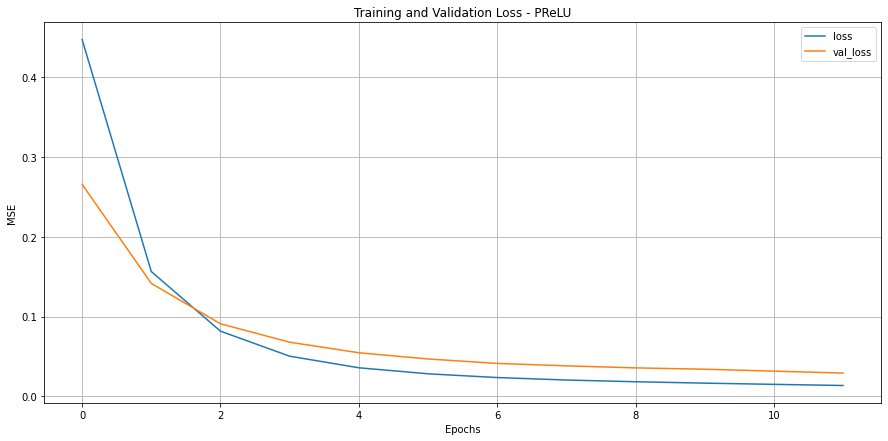

In [0]:
# plot the losses loss metrics
losses[['loss', 'val_loss']].plot(figsize=(15,7))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation Loss - PReLU')
plt.grid()
plt.legend()

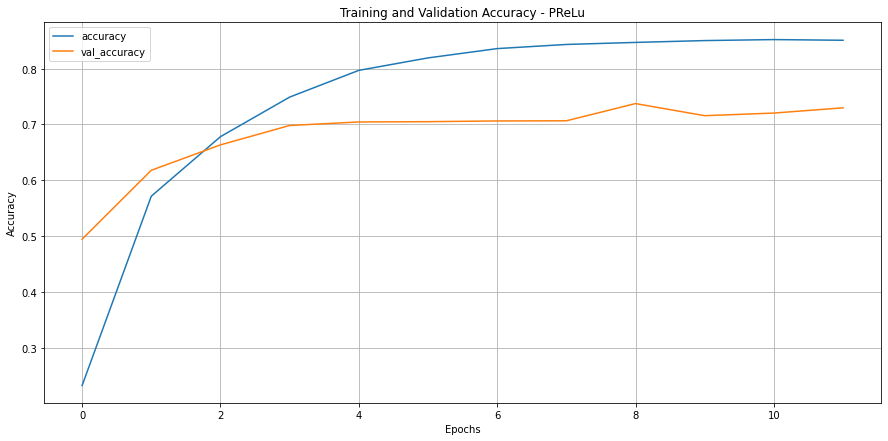

In [0]:
# plot the accuracy metrics
losses[['accuracy', 'val_accuracy']].plot(figsize=(15,7))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy - PReLu')
plt.legend()
plt.grid()

In [0]:
# also save the encoder model
# encoder_model.save("drive/My Drive/Thesis/data/Embedding_Data/embedding_encoder_22.h5")
# load the encoder model
encoder_model = load_model("drive/My Drive/Thesis/data/Embedding_Data/embedding_encoder_43.h5")

In [0]:
# Fetch the embeddings from the Encoder Model
encoder_embed_train = encoder_model.predict(XTrain_embed)
encoder_embed_test = encoder_model.predict(XTest_embed)

In [0]:
# remove old logs
!rm -rf ./logs/ 

## Testing Embeddings
Here we test our embeddings

### Random Forest RUL Evaluation

In [0]:
# Split embedding data based on Chassis information
train_dd, test_dd = validationSplit(data2, split=0.2)
# extract train and test data
#XTrain_embed = train_embed.iloc[:, :169].values
#XTest_embed = test_embed.iloc[:, :169].values

In [0]:
yTrain_dd = train_dd['RUL'].values
yTest_dd = test_dd['RUL'].values

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
regr = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100, criterion='mae', max_depth=100, verbose=2) 

In [0]:
regr.fit(encoder_embed_train, yTrain_dd)

In [0]:
predictions = regr.predict(encoder_embed_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [0]:
# plotting our prediction result
test_predictions = pd.Series(predictions.reshape(3823,))
pred_df = pd.DataFrame(yTest_dd, columns=['True RUL'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['True RUL', 'Predicted RUL']

Text(0.5, 1.0, 'Random Forest Prediction on AE Embeddings')

<Figure size 432x288 with 0 Axes>

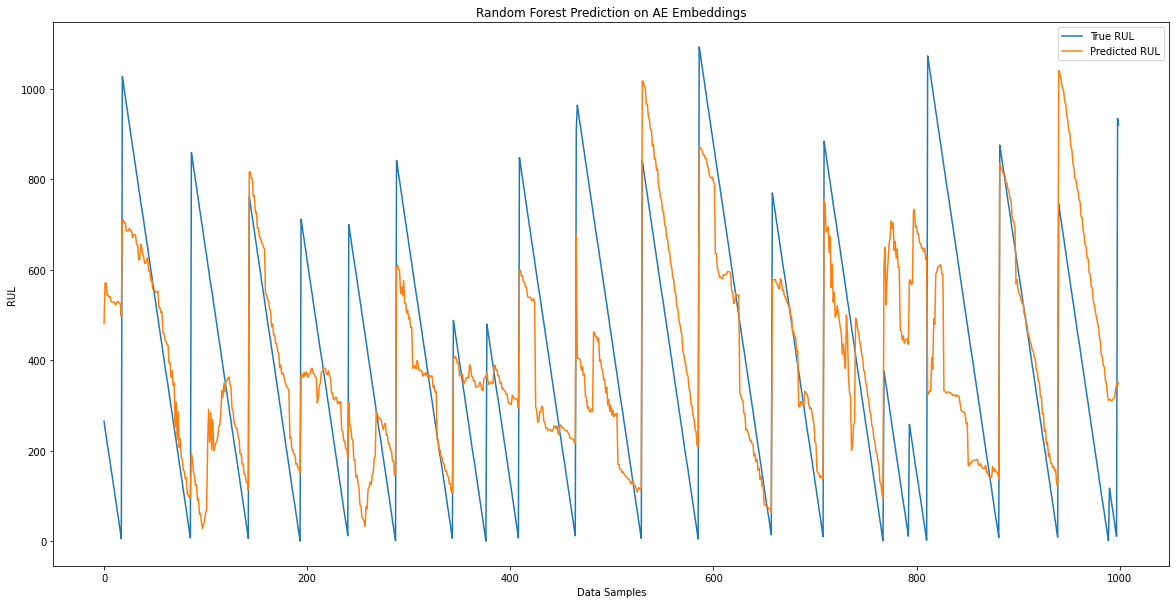

In [0]:
plt.figure()
pred_df[:1000].plot(figsize=(20,10))
plt.xlabel('Data Samples')
plt.ylabel('RUL')
plt.title('Random Forest Prediction on AE Embeddings')

In [0]:
from sklearn.metrics import mean_absolute_error, explained_variance_score

In [0]:
# mean absolute error for our predictions
mean_absolute_error(pred_df['True RUL'], pred_df['Predicted RUL'])

181.2998875228878

In [0]:
# explained variance score
explained_variance_score(pred_df['True RUL'].values, pred_df['Predicted RUL'].values)

0.243707707344629

# View Embeddings

In [0]:
# import TSNE and PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [0]:
tsne = TSNE(n_components=2, n_iter=1000, perplexity=50)
reduced_tsne = tsne.fit_transform(encoder_embed_test)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoder_embed_test)

In [0]:
# label encoding for the chassis
chassis_target = pd.factorize(test_embed.loc[:, 'T_CHASSIS'].values)[0]
chassis_target.shape

(3823,)

In [0]:
codes, uniques = pd.factorize(test_embed.loc[:, 'T_CHASSIS'].values)

In [0]:
x1 = encoder_embed_test[1013]
x2 = encoder_embed_test[3000]


# calculating the cosing similarity of two vectors in the orginal space
a_dot = np.dot(x1, x2)
similar = a_dot / (np.linalg.norm(x1) * np.linalg.norm(x2))
similar


0.649555

In [0]:
'''
0-746402 and O-678360, 0-778558
Chekc distance from 
O-803915 and O-719898
O-719156 and O-753014
'''

'\n0-746402 and O-678360, 0-778558\nChekc distance from \nO-803915 and O-719898\nO-719156 and O-753014\n'

Observation between 0-746402 and O-678360. Calculating the cosine similarity between those two embedding points shows a value of 0.75161475. The farthest point to this is O-803915 and the similarity value is 0.25650138

0.7942, 0.6742973 (ElU), 0.4070125 (PReLU)

In [0]:
x1 = XTest_embed[956]
x2 = XTest_embed[805]
#O-719898

# calculating the cosing similarity of two vectors in the orginal space
a_dot = np.dot(x1, x2)
similar = a_dot / (np.linalg.norm(x1) * np.linalg.norm(x2))
similar


0.6811176

In [0]:
np.unique(chassis_target[900:1000])

array([18, 19, 20])

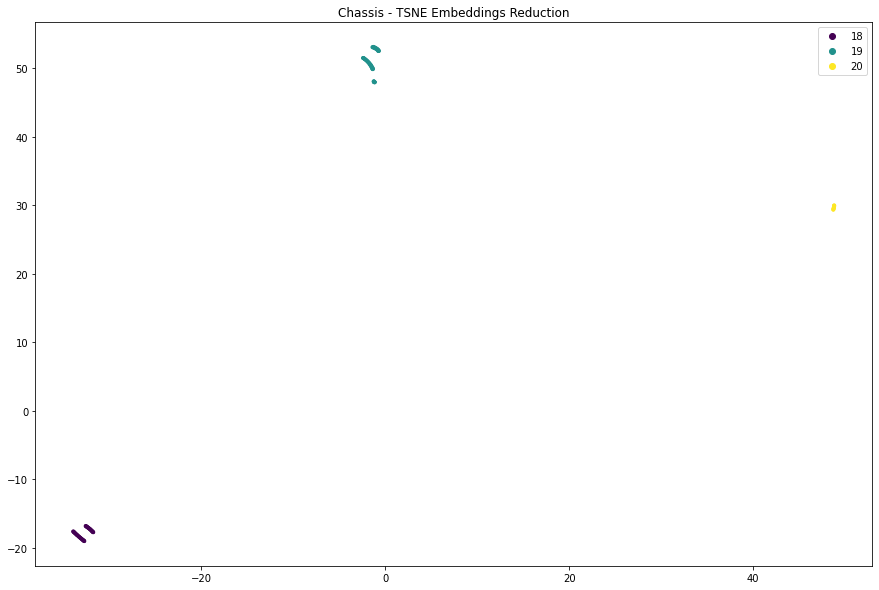

In [0]:
fig = plt.figure(figsize=(15,10))
scatter = plt.scatter(reduced_tsne[900:1000,0], reduced_tsne[900:1000,1], c=chassis_target[900:1000], marker='.', label=np.unique(chassis_target[900:1000]))
plt.title('Chassis - TSNE Embeddings Reduction')
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(chassis_target[900:1000])))

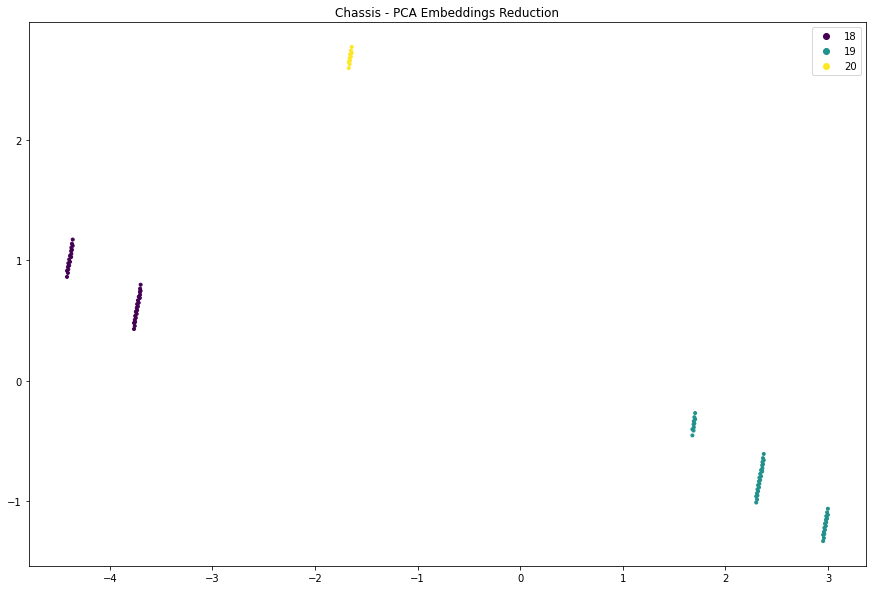

In [0]:
fig = plt.figure(figsize=(15,10))
scatter = plt.scatter(pca_data[900:1000,0], pca_data[900:1000,1], c=chassis_target[900:1000], marker='.', label=np.unique(chassis_target[900:1000]))
plt.title('Chassis - PCA Embeddings Reduction')
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(chassis_target[900:1000])))

In [0]:
## 
'''
0-746402 and O-678360, 0-778558
Chekc distance from 
O-803915 and O-719898
O-719156 and O-753014
'''
## '''

'\n0-746402 and O-678360, 0-778558\nChekc distance from \nO-803915 and O-719898\nO-719156 and O-753014\n'

In [0]:
np.unique(chassis_target[:1000])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

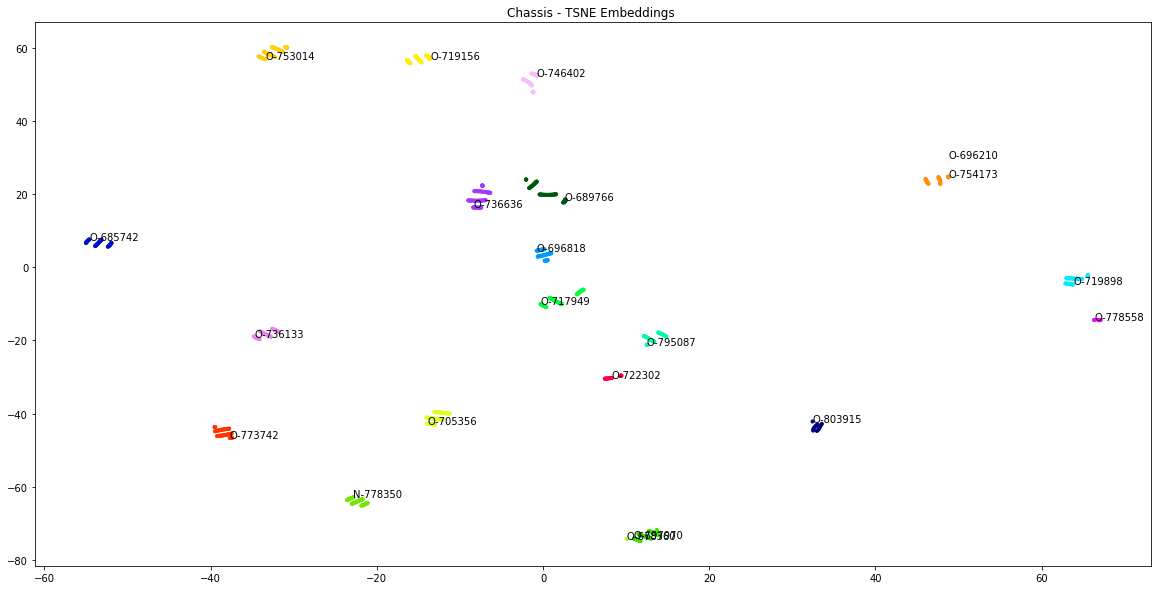

In [0]:
fig = plt.figure(figsize=(20, 10))
scatter2 = plt.scatter(reduced_tsne[:1000,0], reduced_tsne[:1000,1], c=chassis_target[:1000], cmap=plt.cm.get_cmap("gist_ncar"), marker='.')
plt.title('Chassis - TSNE Embeddings ')

counter = []
for i, txt in enumerate(test_embed.loc[:1000, 'T_CHASSIS'].values):
  if txt not in counter:
    plt.annotate(txt, (reduced_tsne[i,0], reduced_tsne[i,1]))
    counter.append(txt)

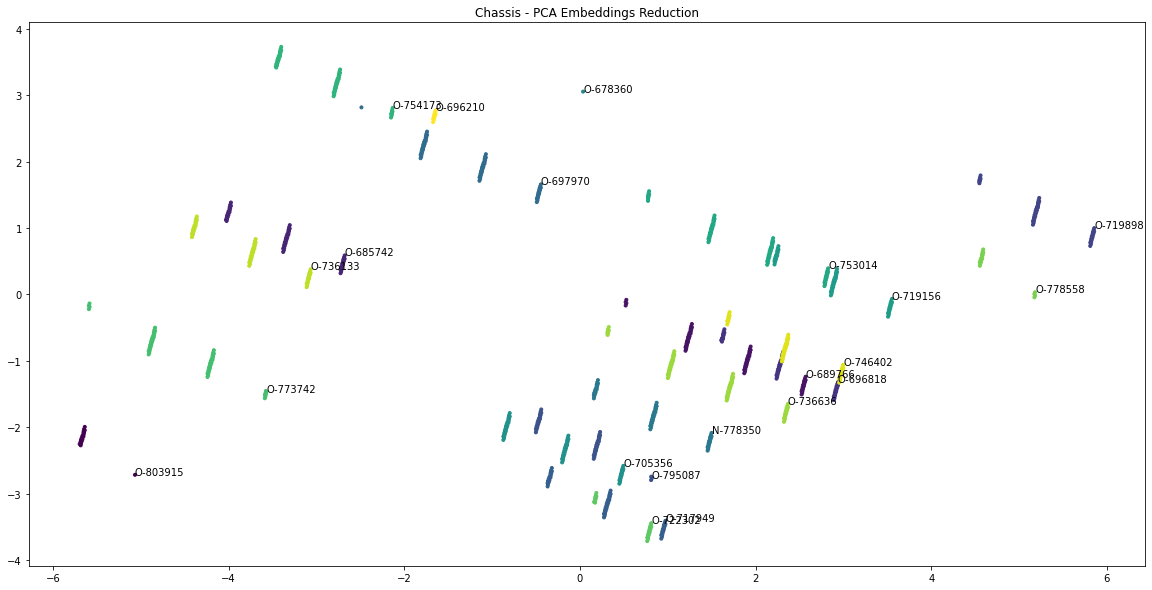

In [0]:
fig = plt.figure(figsize=(20,10))
plt.scatter(pca_data[:1000,0], pca_data[:1000,1], c=chassis_target[:1000], marker='.')
plt.title('Chassis - PCA Embeddings Reduction')
counter = []
for i, txt in enumerate(test_embed.loc[:1000, 'T_CHASSIS'].values):
  if txt not in counter:
    plt.annotate(txt, (pca_data[i,0], pca_data[i,1]))
    counter.append(txt) 

In [0]:
'''
Chekc distance from 
O-803915 and O-719898
O-719156 and O-753014
'''

'\nChekc distance from \nO-803915 and O-719898\nO-719156 and O-753014\n'